<a href="https://colab.research.google.com/github/Maryamelias/DATA3421.Maryam/blob/main/Wk3_HW2_Data_Preprocessing_Maryam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("ClimateData.csv")

# **Q1: Data Undestanding and Summary:**

In [ ]:
## data types of each variable
df.dtypes

id                        int64
building_class           object
floor_area              float64
year_built              float64
precipitation_inches    float64
snowfall_inches         float64
avg_temp                float64
days_with_fog           float64
site_eui                float64
dtype: object

In [ ]:
## Data Summary
df.describe()

,id,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
count,75757.000000,7.575700e+04,73920.000000,75757.000000,75757.000000,75757.000000,29961.000000,75757.000000
mean,37878.000000,1.659839e+05,1952.306764,42.430651,29.136379,56.176705,109.142051,82.584707
std,21869.306509,2.468758e+05,37.053619,10.592205,17.810894,2.241940,50.699751,58.255413
min,0.000000,9.430000e+02,0.000000,0.000000,0.000000,44.512329,12.000000,1.000000
25%,18939.000000,6.237900e+04,1927.000000,39.350000,9.600000,55.147541,88.000000,54.530000
50%,37878.000000,9.136700e+04,1951.000000,42.170000,31.600000,56.835616,104.000000,75.290000
75%,56817.000000,1.660000e+05,1977.000000,46.320000,49.100000,57.215847,131.000000,97.280000
max,75756.000000,6.385382e+06,2015.000000,107.690000,127.300000,77.245205,311.000000,997.870000


# **Q2:Unique Values Analysis:**

In [ ]:
## Unique values in the categorical variables
df.describe(include='object')

,building_class
count,75757
unique,2
top,Residential
freq,43558


In [ ]:
unique_var = df['building_class'].unique()
print(unique_var)

['Commercial' 'Residential']


# **Q3:Descriptive Statistics:**

In [ ]:
#Summary of the descriptive statistcs for the datasets
## Central tendency and dispersion
summary = df.describe()
variance = df.var()
median = df.median()
mode = df.mode().iloc[0]

summary.loc['variance'] = variance
summary.loc['median'] = median
summary.loc['mode'] = mode

print(summary)

                    id    floor_area    year_built  precipitation_inches  \
count     7.575700e+04  7.575700e+04  73920.000000          75757.000000   
mean      3.787800e+04  1.659839e+05   1952.306764             42.430651   
std       2.186931e+04  2.468758e+05     37.053619             10.592205   
min       0.000000e+00  9.430000e+02      0.000000              0.000000   
25%       1.893900e+04  6.237900e+04   1927.000000             39.350000   
50%       3.787800e+04  9.136700e+04   1951.000000             42.170000   
75%       5.681700e+04  1.660000e+05   1977.000000             46.320000   
max       7.575600e+04  6.385382e+06   2015.000000            107.690000   
variance  4.782666e+08  6.094766e+10   1372.970682            112.194800   
median    3.787800e+04  9.136700e+04   1951.000000             42.170000   
mode      0.000000e+00  6.000000e+04   1927.000000             42.170000   

          snowfall_inches      avg_temp  days_with_fog      site_eui  
count        757

<ipython-input-57-a47a9bc2cf47>:4: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = df.var()
<ipython-input-57-a47a9bc2cf47>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = df.median()


id
floor_area
year_built
precipitation_inches
snowfall_inches
avg_temp
days_with_fog
site_eui


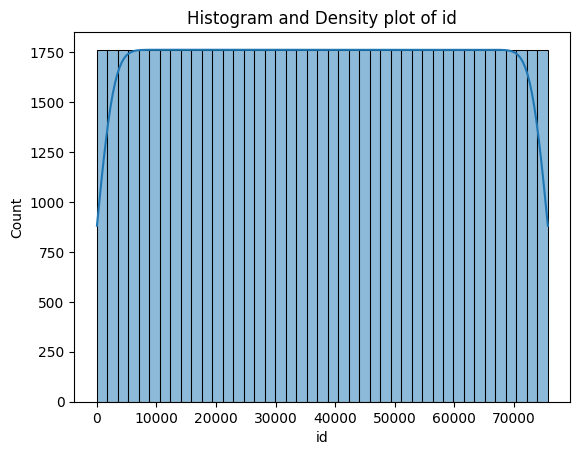

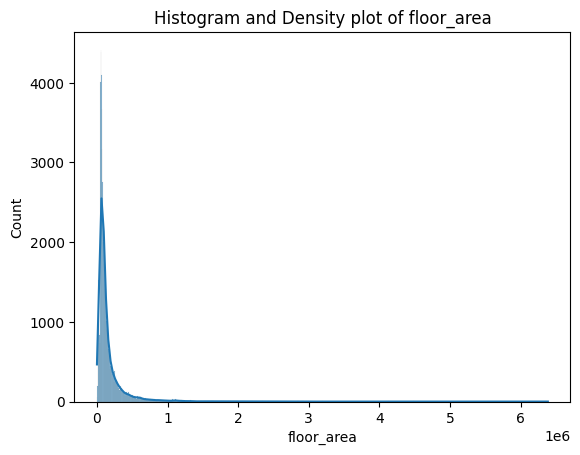

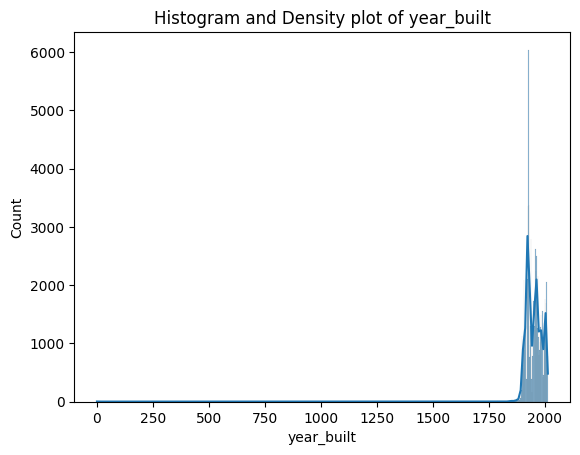

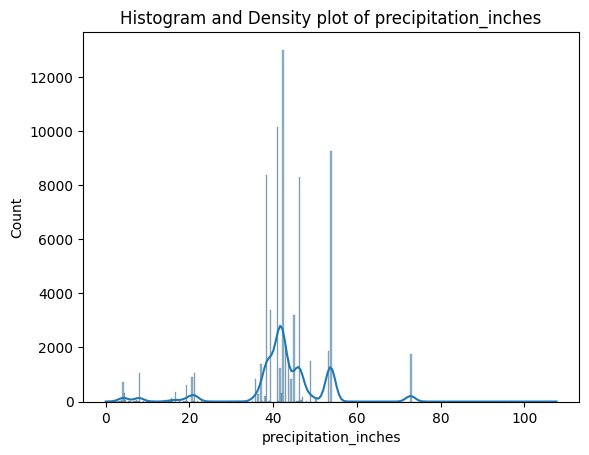

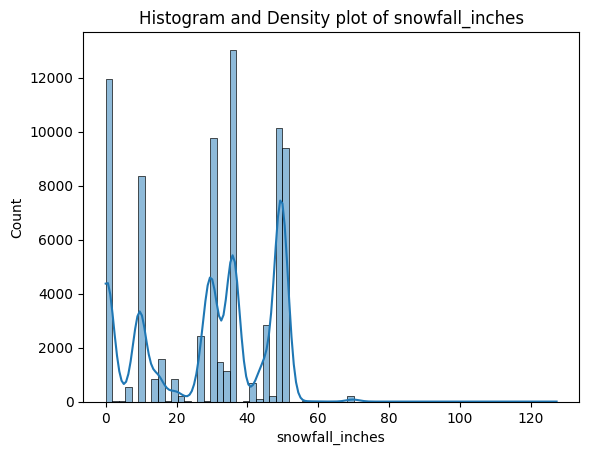

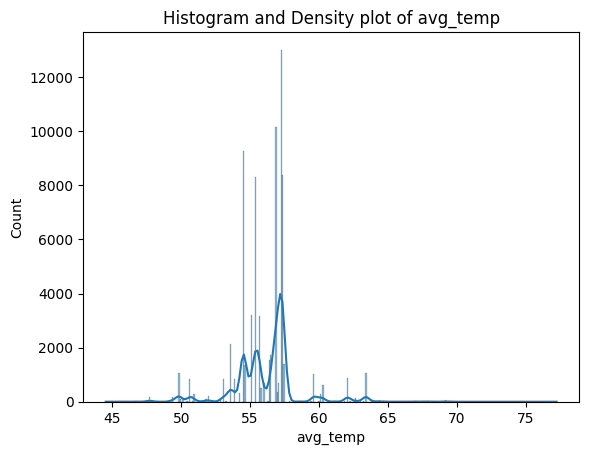

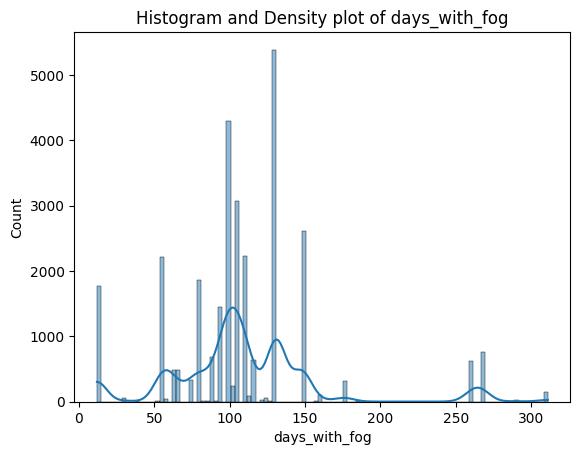

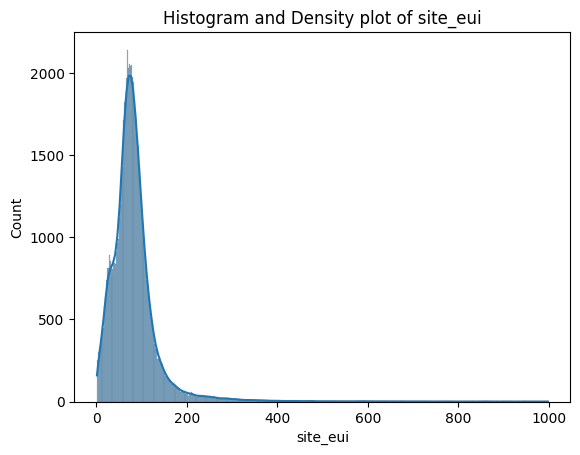

In [ ]:
## Visualizing the Dispersion - Histogram
for col in df.select_dtypes(include=['number']).columns:
  print(col)
  plt.figure()
  sns.histplot(df[col], kde=True)
  plt.title(f"Histogram and Density plot of {col}")
  plt.show

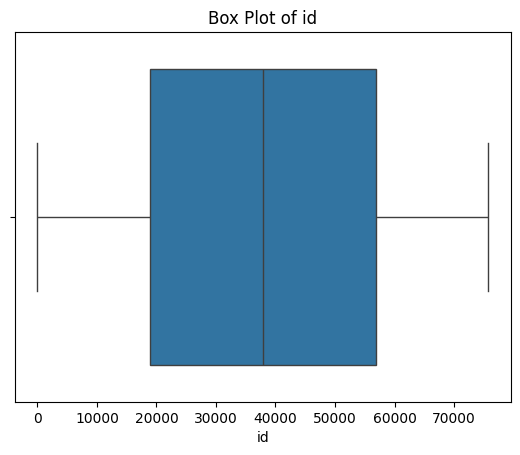

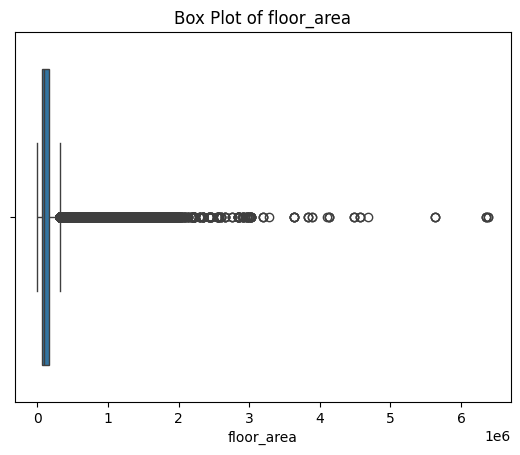

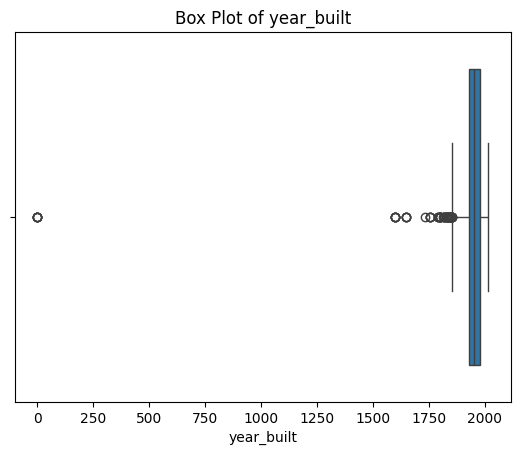

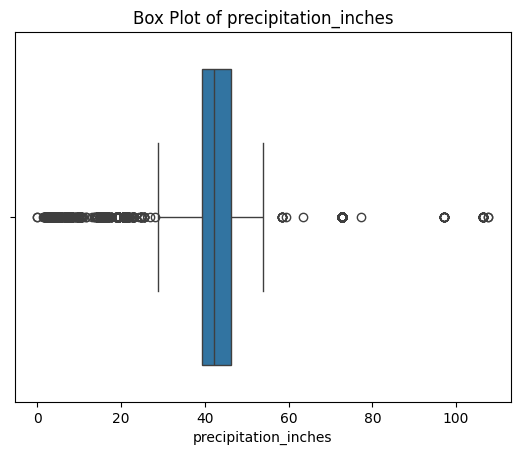

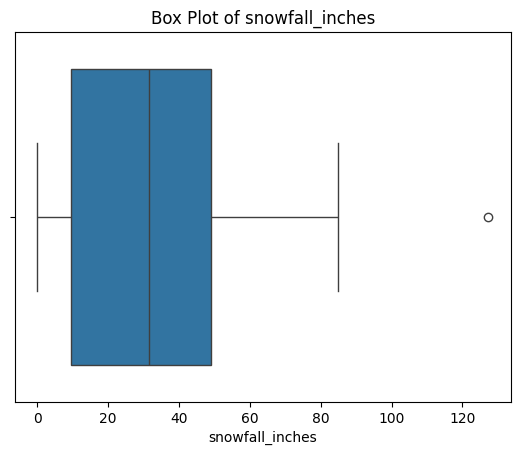

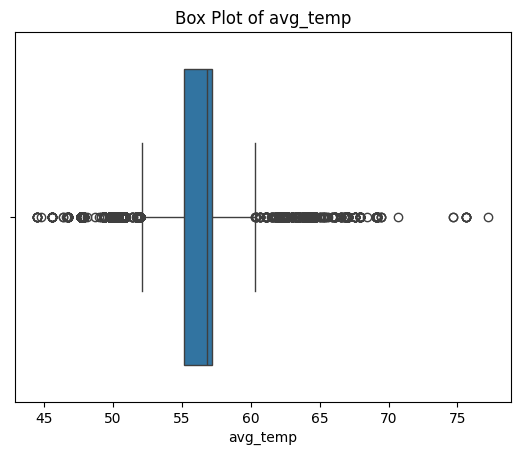

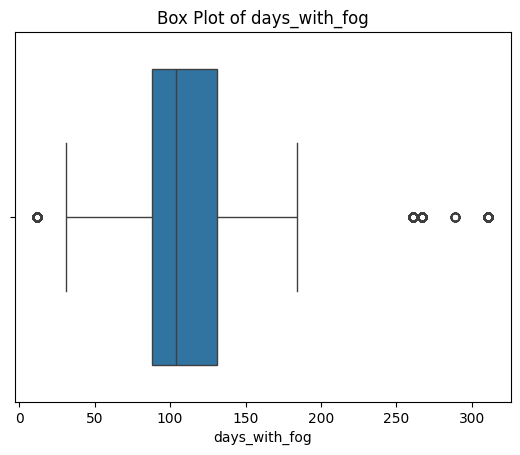

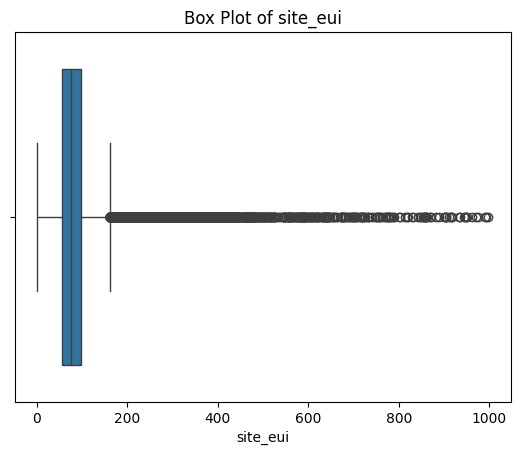

In [ ]:
## Visulaizing the dispersion using Boxplot
for col in df.select_dtypes(include=['number']).columns:
  plt.figure()
  sns.boxplot(x=df[col])
  plt.title(f"Box Plot of {col}")
  plt.show

# **Q4: Missing Values Assessment:**

In [ ]:
## Missing data affects the integrity and quality of our data.
missing_data = df.isnull().sum()
print("Missing data:\n", missing_data)

Missing data:
 id                          0
building_class              0
floor_area                  0
year_built               1837
precipitation_inches        0
snowfall_inches             0
avg_temp                    0
days_with_fog           45796
site_eui                    0
dtype: int64


# **Q5:Missing Data Handling:**
I will be handing the mssing value with imputation mainly because i feel like the amount of missing data is to much to disgrad like that. Specifically median imputation because of the amount of ouliers they have an median is less sensitive to that.

In [ ]:
df.head()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90


In [ ]:
## Median imputation for year_built
df['year_built'].fillna(df['year_built'].median(), inplace = True)

In [ ]:
## Median imputation for days_with_fog
df['days_with_fog'].fillna(df['days_with_fog'].median(), inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    75757 non-null  int64  
 1   building_class        75757 non-null  object 
 2   floor_area            75757 non-null  float64
 3   year_built            75757 non-null  float64
 4   precipitation_inches  75757 non-null  float64
 5   snowfall_inches       75757 non-null  float64
 6   avg_temp              75757 non-null  float64
 7   days_with_fog         75757 non-null  float64
 8   site_eui              75757 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.2+ MB


In [ ]:
df.head()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,104.0,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,104.0,3.90


# **Q6: Duplicate Records:**

In [ ]:
##Looking for duplicates

duplicates = df.duplicated().sum()
print("Number of Duplicate:", duplicates)

Number of Duplicate: 0


In [ ]:
## Checking for invalid_entries
invalid_entries=df[df.select_dtypes(include=['number'])<0].count()
print("Invalid Entries:\n", invalid_entries)

Invalid Entries:
 id                      0
building_class          0
floor_area              0
year_built              0
precipitation_inches    0
snowfall_inches         0
avg_temp                0
days_with_fog           0
site_eui                0
dtype: int64


# **Q7: Outliers Detection with Boxplots:**

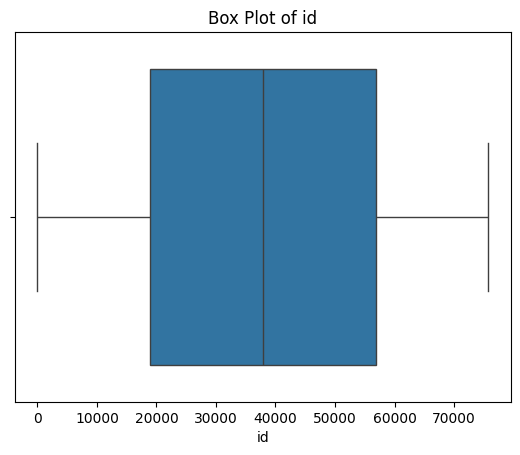

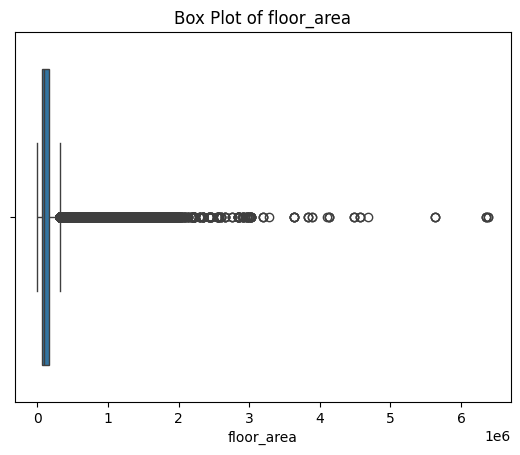

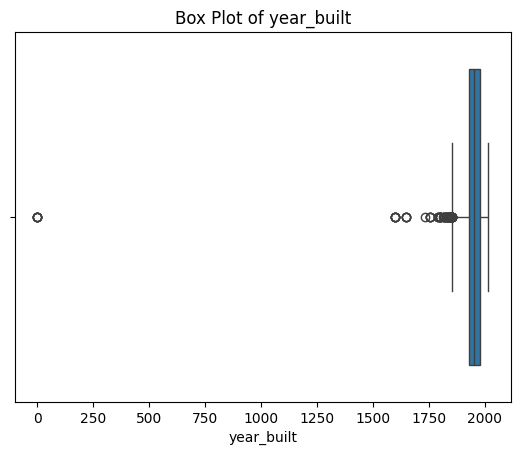

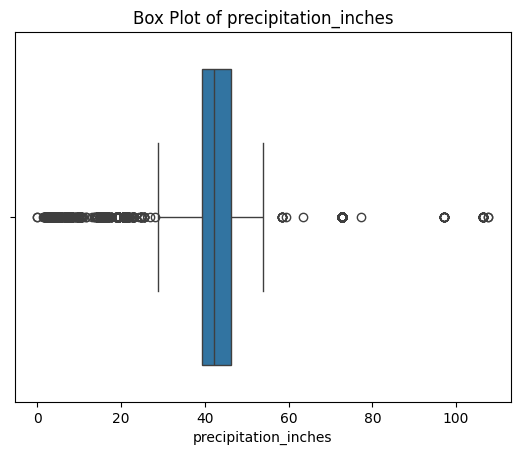

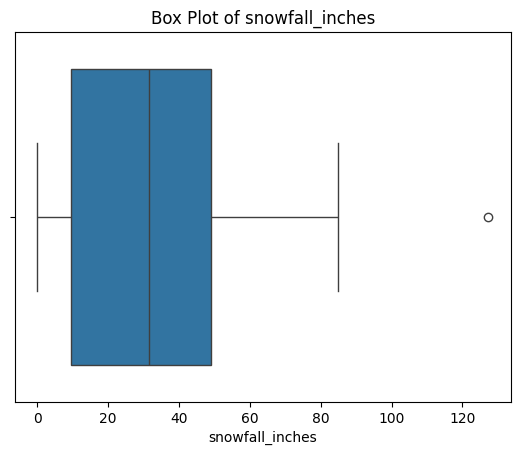

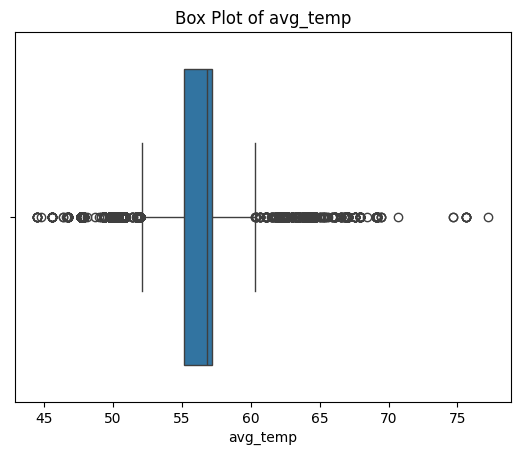

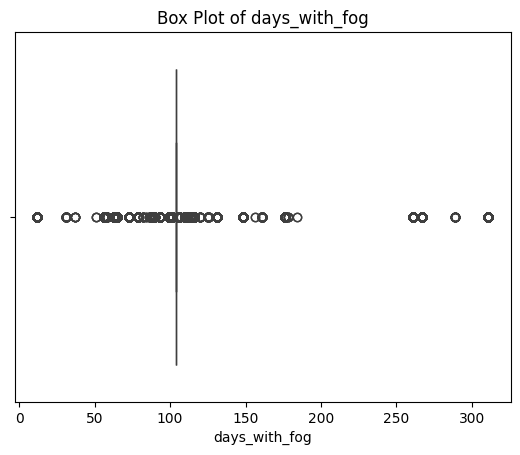

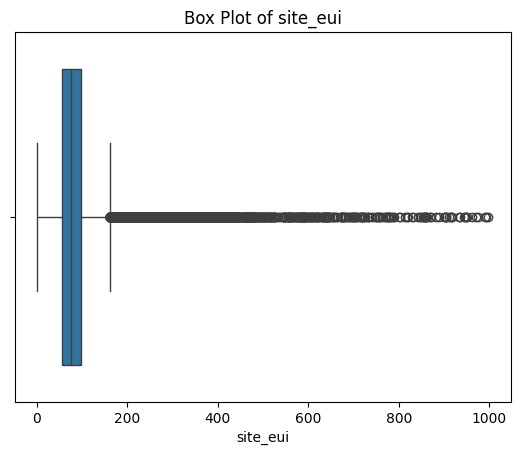

In [ ]:
#Detecting outliers using the boxplot methods
for col in df.select_dtypes(include=['number']).columns:
  plt.figure()
  sns.boxplot(x=df[col])
  plt.title(f"Box Plot of {col}")
  plt.show

The presence of outliers just distort our data visualiation and it has definitely  skew our descriptive statistics.

In [ ]:
df.head()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,104.0,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,104.0,3.90


In [ ]:
df.shape

(75757, 9)

In [ ]:
##Normalizing the data with the logarithms method
# Select only numerical columns
num_columns = df.select_dtypes(include=np.number).columns

# Apply logarithmic transformation to numerical columns
df[num_columns] = df[num_columns].apply(lambda x: np.log10(x))

# Display the transformed DataFrame
print(df)

             id building_class  floor_area  year_built  precipitation_inches  \
0          -inf     Commercial    4.787049    3.288249              1.219846   
1      0.000000     Commercial    5.437751    3.291147              1.219846   
2      0.301030     Commercial    5.447197    3.290257              1.219846   
3      0.477121     Commercial    4.742921    3.296665              1.219846   
4      0.602060     Commercial    4.819544    3.297761              1.219846   
...         ...            ...         ...         ...                   ...   
75752  4.879394     Commercial    4.309843    3.299943              1.653502   
75753  4.879400    Residential    4.607337    3.281033              1.653502   
75754  4.879406     Commercial    4.448273    3.282622              2.026615   
75755  4.879411     Commercial    4.728962    3.303628              2.026615   
75756  4.879417    Residential    4.378180    3.295347              2.032175   

       snowfall_inches  avg_temp  days_

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


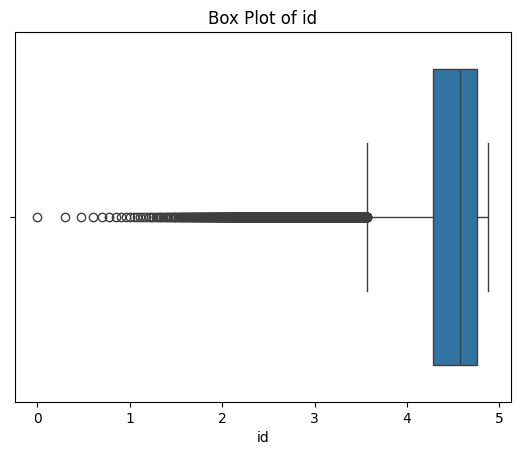

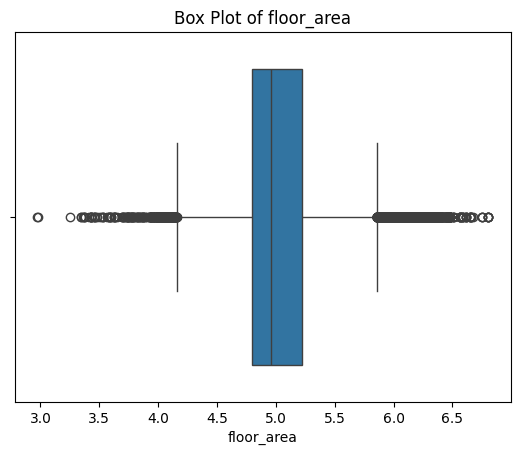

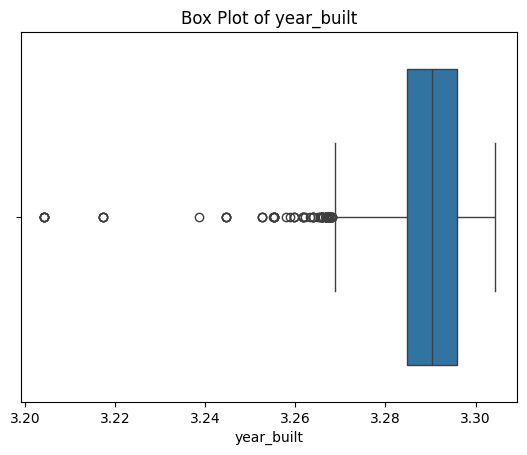

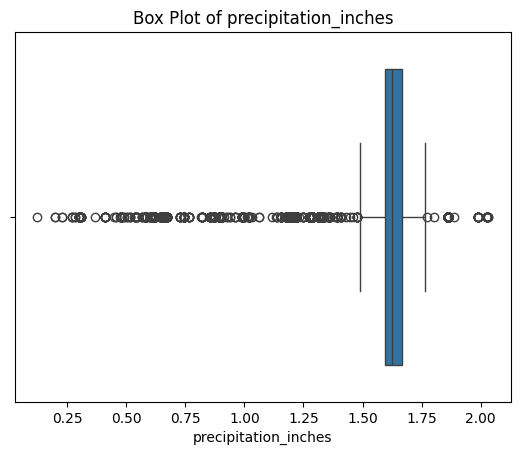

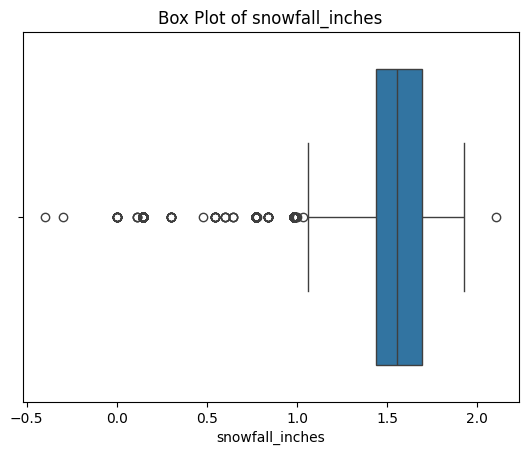

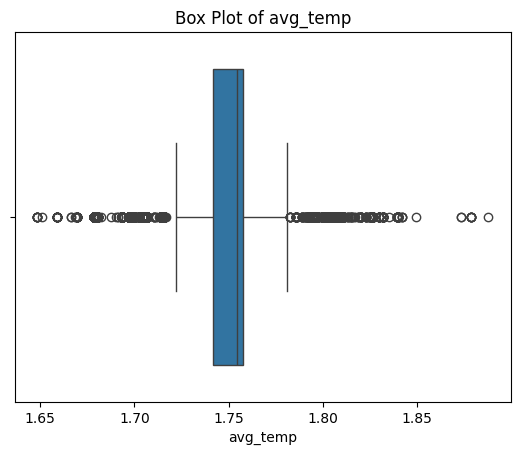

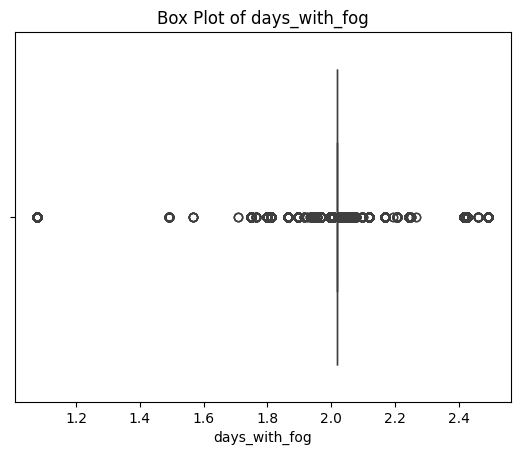

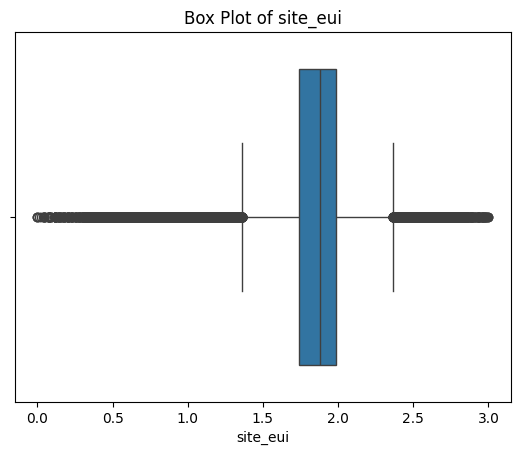

In [ ]:
for col in df.select_dtypes(include=['number']).columns:
  plt.figure()
  sns.boxplot(x=df[col])
  plt.title(f"Box Plot of {col}")
  plt.show

I have transformed the data using the logarithimic method those are my results.

# **Q8. Histogram Analysis for Distribution:**

id
floor_area
year_built
precipitation_inches
snowfall_inches
avg_temp
days_with_fog
site_eui


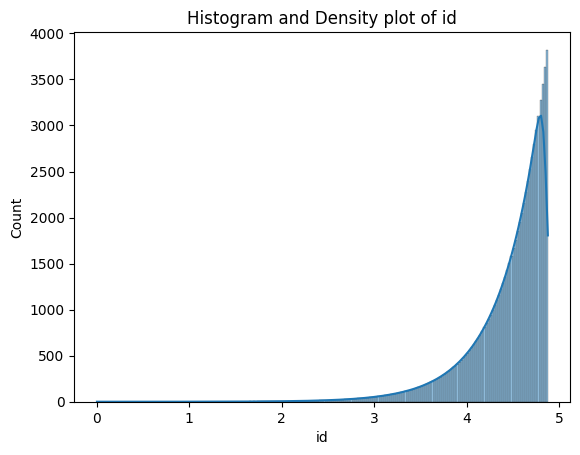

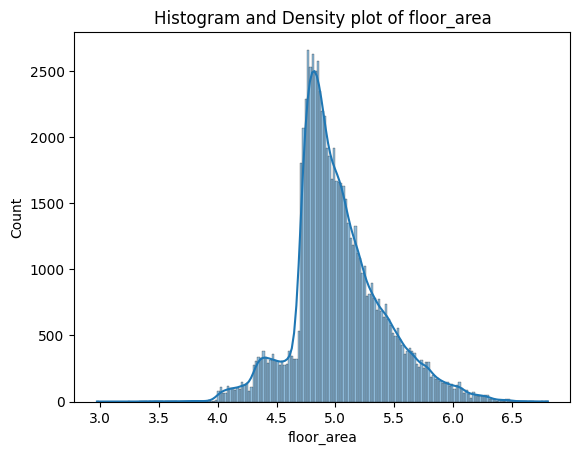

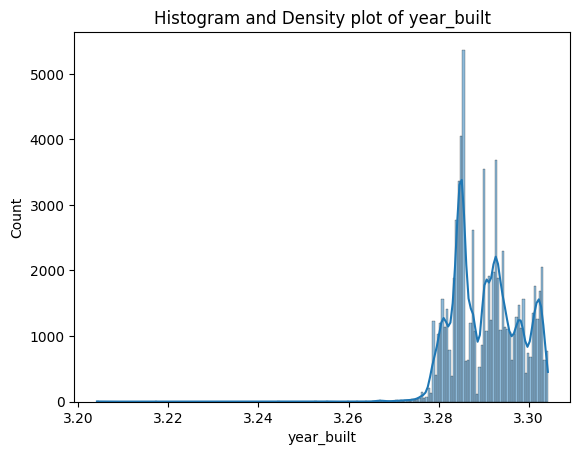

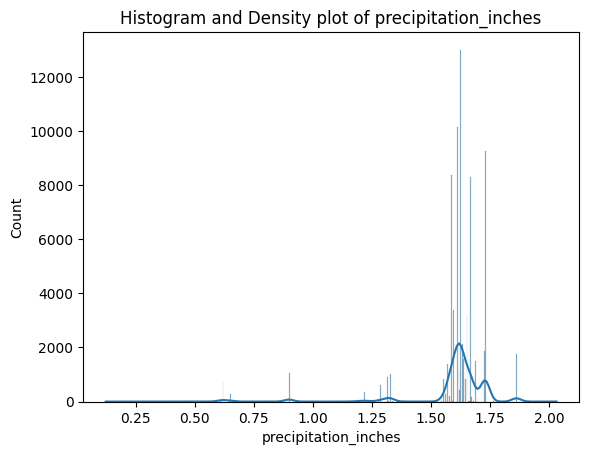

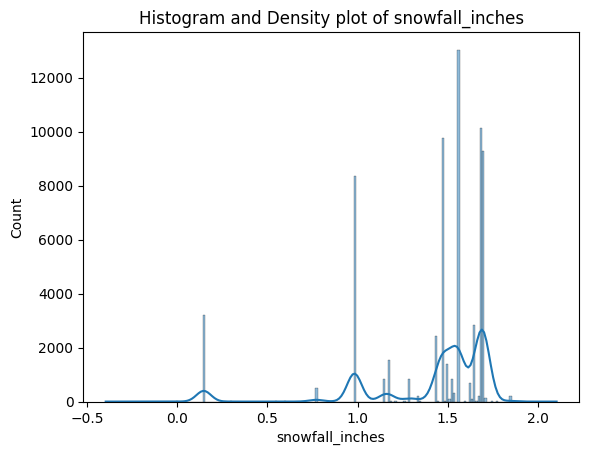

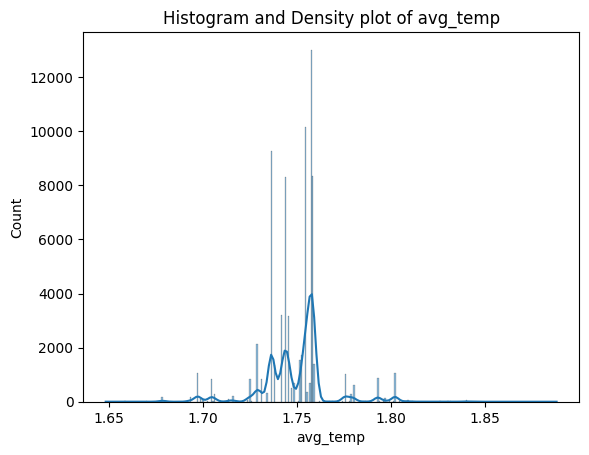

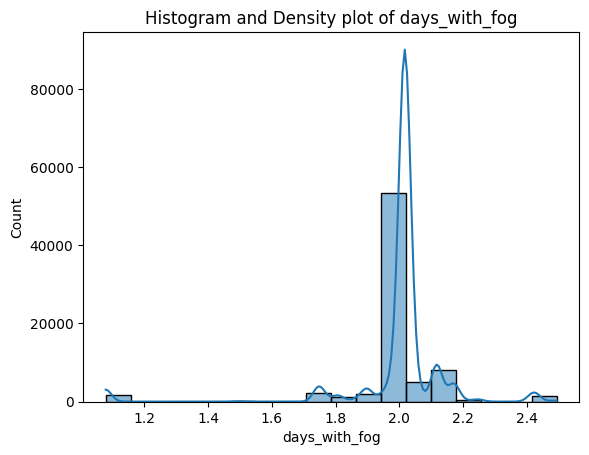

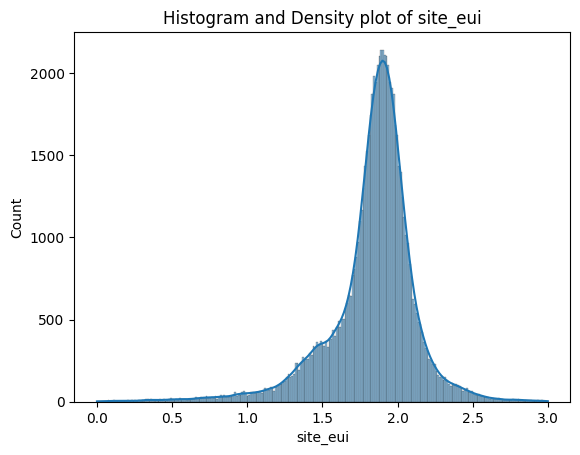

In [ ]:
## For numerical variables
for col in df.select_dtypes(include=['number']).columns:
  print(col)
  plt.figure()
  sns.histplot(df[col], kde=True)
  plt.title(f"Histogram and Density plot of {col}")
  plt.show

There are noticable skewness in my data, and this is going to affect the accuracy of my analysis and integrity of my data

# **9. Feature Scaling:**

Yes, I think the dataset need feature scaling specifically PCA, since I'm not trying to add feature but reduce it but also keep the variability at the same time

# **10. Outlier Detection with Z-score:**


In [ ]:
z_scores = (df - np.mean(df)) / np.std(df)
threshold =3
outliers = np.abs(z_scores) > threshold
print("Number of outliers:", np.sum(outliers))


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Number of outliers: avg_temp                2892
building_class             0
days_with_fog           1761
floor_area               615
id                         0
precipitation_inches       0
site_eui                1432
snowfall_inches            0
year_built                 0
dtype: int64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


# **Q11. Range Analysis:**

In [ ]:
num_columns= df.select_dtypes(include=['float64', 'int64']).columns

max_num = df[num_column].max()
min_num = df[num_column].min()
variable_range= max_num -min_num

print("The range of the Variable:", variable_range)

The range of the Variable: id                           inf
floor_area              3.830675
year_built                   inf
precipitation_inches         inf
snowfall_inches              inf
avg_temp                0.239391
days_with_fog           1.413579
site_eui                2.999074
dtype: float64


# **Q12.Encoding Categorical Variables:**

In [ ]:
# One-Hot Encoding
one_hot_encoding = pd.get_dummies(df['building_class'], prefix='category')
print("\nOne-Hot Encoding:")
print(one_hot_encoding)


One-Hot Encoding:
       category_Commercial  category_Residential
0                        1                     0
1                        1                     0
2                        1                     0
3                        1                     0
4                        1                     0
...                    ...                   ...
75752                    1                     0
75753                    0                     1
75754                    1                     0
75755                    1                     0
75756                    0                     1

[75757 rows x 2 columns]
